In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# INWARD REMITTANCES (receiving, incoming)

In [2]:
inrem = pd.read_excel (inward_remit.xlsx')
inrem.sample(5)

,Migrant remittance inflows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021e,Remittances as a share of GDP in 2021e (%)
151,Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2707.246390,2636.539865,2725.062654,2883.886545,3051.238954,3224.754055,3325.921219,2938.616916,2938,1.300817
107,Latvia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1604.442121,1553.480634,1335.768739,1234.945490,1274.146124,1237.349320,1142.611838,1088.349705,1301.779661,3.499502
99,Kenya,12.937679,7.405362,7.049781,5.709342,5.827718,6.329069,10.045766,10.513847,12.058308,...,1304.270349,1440.840740,1569.256448,1744.642661,1962.264726,2720.366061,2838.192215,3100.000000,3689,3.369227
162,Sao Tome and Principe,0.773624,0.955743,0.712219,1.096015,3.254174,0.278000,0.085517,0.070096,0.063699,...,26.566723,26.827849,19.980197,18.044841,18.192067,17.776130,11.114429,8.620359,10.344431,1.937159
103,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1058.400000,1098.945957,971.416388,985.798459,1112.078354,1235.727938,1248.990731,1436.087664,1500,16.744809


In [3]:
inrem = inrem[:216]
inrem = inrem[:216]
inrem = inrem.dropna(how='all')
inrem0 = inrem.replace(np.nan, 0)
inrem0 = inrem0.rename(columns={"Migrant remittance inflows (US$ million)": "inflow_country", "Remittances as a share of GDP in 2021e (%)": "remit_gdp"}).set_index('inflow_country').replace(' ', np.nan)
# rename country column, rename %GDP column, set country column as index, replace empty value with Nan
inrem0['total_rem'] = inrem0.sum(axis=1)
# add column for aggregate remittances

In [4]:
inrem0.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021e,remit_gdp,total_rem
inflow_country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,788.917115,627.710802,3.117356,6458.398367
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1465.987212,1600.000000,9.540847,31937.846673
Algeria,406.0,447.0,507.0,392.0,329.0,313.0,358.0,487.0,379.0,345.0,...,2452.442617,1997.393458,1989.023597,1791.887073,1984.998399,1785.838683,1699.608935,1759.095247,1.073850,21545.679823
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Countries RECEIVING the most remittances

In [5]:
inrem_countries = inrem0.sort_values('total_rem', ascending=False)[2:]
inrem_countries = inrem_countries.drop('remit_gdp', axis=1).drop('total_rem', axis=1)
inrem_countries.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021e
inflow_country,,,,,,,,,,,,,,,,,,,,,
India,2761.280685,2301.890115,2621.913836,2662.479622,2293.065837,2472.285487,2243.013880,2663.469748,2316.724191,2609.857302,...,68820.517838,69970.360847,70388.642797,68909.693353,62744.364090,68967.175500,78790.170929,83332.078002,83149.172934,87000.000000
China,0.000000,0.000000,616.000000,542.000000,403.000000,271.000000,407.000000,166.000000,129.000000,76.000000,...,57986.598422,59491.287194,62332.342308,63937.646592,60999.999488,63875.674112,67413.592064,68398.475114,59506.673349,53000.000000
Mexico,1039.000000,1220.000000,1226.000000,1391.000000,1564.000000,1619.000000,1771.000000,1987.000000,2442.000000,2790.000000,...,23208.649190,23188.811955,24802.081325,26233.171803,28690.957406,32270.507679,35768.416627,39021.789685,42878.274907,52742.962524
Philippines,626.000000,800.000000,1049.000000,1124.000000,718.000000,806.000000,861.000000,1020.000000,1262.000000,1360.000000,...,24609.679613,26716.840269,28690.797896,29799.395700,31141.973475,32809.770434,33808.967986,35167.471832,34913.342999,36240.000000
France,1441.000000,1279.000000,1342.000000,1279.000000,1262.000000,1391.000000,2022.000000,2469.000000,3424.000000,3221.000000,...,22666.366759,24412.282153,25358.374728,24066.989837,24042.348847,24884.547856,26878.780498,26173.645645,25141.879667,27161.082269
"Egypt, Arab Rep.",2700.000000,2180.000000,2440.000000,3670.000000,3960.000000,3210.000000,2510.000000,3600.000000,3770.000000,3290.000000,...,19236.400000,17833.100000,19570.400000,18325.400000,18590.400000,24737.400000,25515.700000,26781.400000,29602.900000,33332.900000
Nigeria,21.946634,16.188874,17.818397,13.804340,11.741262,10.069659,3.989688,2.739018,2.424527,10.183666,...,20542.884460,20797.073957,20999.100000,20626.046924,19697.938004,22037.016832,24311.022416,23809.281401,17207.547306,17637.735989
Germany,2380.490025,2122.568011,2230.321490,2121.863023,1964.053677,2018.489955,2778.150473,3586.776088,3839.278991,3753.973758,...,14637.030444,16395.715917,17075.378095,15578.082899,15197.536776,15688.314346,16887.715832,18271.041363,17898.798739,19616.689581
Pakistan,2050.000000,2070.000000,2590.000000,2940.000000,2580.000000,2540.000000,2450.000000,2180.000000,1870.000000,2020.000000,...,14007.000000,14629.000000,17244.000000,19306.000000,19819.000000,19856.000000,21193.000000,22252.000000,26108.000000,33000.000000


In [6]:
print('Top 10 inrem countries are:', (inrem_countries.index[:10]))

Top 10 inrem countries are: Index(['India', 'China', 'Mexico', 'Philippines', 'France', 'Egypt, Arab Rep.',
       'Nigeria', 'Germany', 'Pakistan', 'Bangladesh'],
      dtype='object', name='inflow_country')


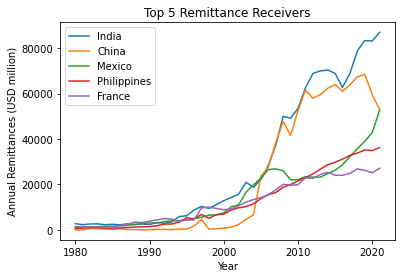

In [7]:
plt.axes(title='Top 5 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best')

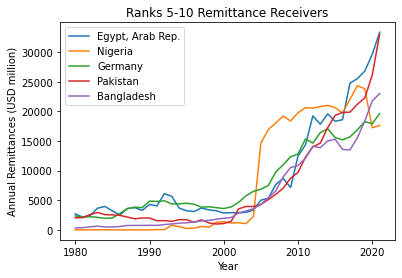

In [8]:
plt.axes(title='Ranks 5-10 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(5,10):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best')

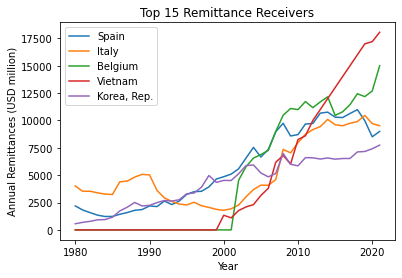

In [9]:
plt.axes(title='Top 15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD million)')
for i in range(10, 15):
    inrem_countries.iloc[i].plot()
plt.legend(loc='best')


In [10]:
for i in range(25):
    inrem_countries.iloc[i].plot()
plt.close()    # close fig

<AxesSubplot:xlabel='inflow_country'>

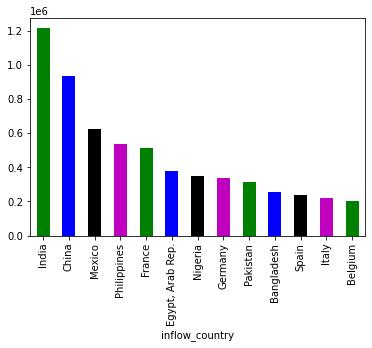

In [11]:
inrem0.sort_values('total_rem', ascending=False).total_rem[2:15].plot(kind='bar', color=['g','b','k','m'])

In [12]:
inrem1 = inrem0.sort_values('total_rem', ascending=False)
inrem1 = inrem1[2:]
inrem1['total_rem'].plot(x='inflow_country', y='total_rem', kind='bar')
plt.close()    # close fig

# Percent of GDP from Remittances (top 10)

(0.0, 1.0)

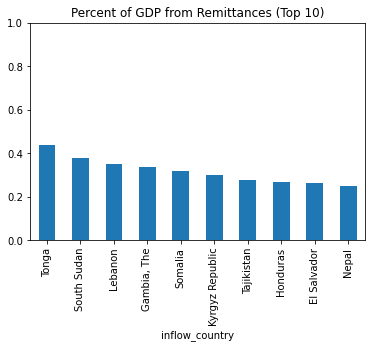

In [13]:
pd.to_numeric(inrem1.remit_gdp)
inrem1 = inrem1.sort_values('remit_gdp', ascending=False)
inrem1['pct_gdp'] = inrem1.remit_gdp / 100
inrem1.pct_gdp.head(10).plot(kind='bar',title='Percent of GDP from Remittances (Top 10)').set_ylim(0,1)

In [14]:
foo = inrem0.sort_values('remit_gdp', ascending=False).head(10)
foo = pd.DataFrame(foo.loc[:,'remit_gdp'])
foo = foo.reset_index()    # creating clean x and y columns
foo

,inflow_country,remit_gdp
0,Tonga,43.924772
1,South Sudan,37.879252
2,Lebanon,34.789036
3,"Gambia, The",33.751224
4,Somalia,31.987463
5,Kyrgyz Republic,30.061350
6,Tajikistan,27.764067
7,Honduras,26.590693
8,El Salvador,26.249955
9,Nepal,24.806654


In [15]:
foo.plot(x='inflow_country', y='remit_gdp', kind='area')
plt.close()    # close fig

<AxesSubplot:xlabel='inflow_country'>

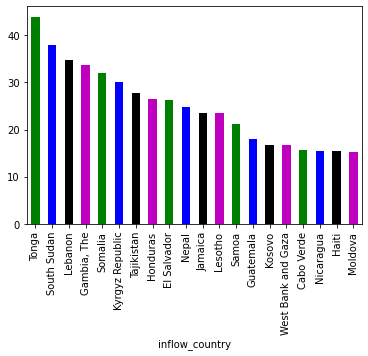

In [16]:
inrem1.sort_values('remit_gdp', ascending=False).remit_gdp[:20].plot(kind='bar', color=['g','b','k','m'])

# OUTWARD REMITTANCES (sending, outgoing)

In [17]:
outrem = pd.read_excel('outward_remit.xlsx')
outrem.sample(10)
outrem = outrem[:215]
outrem = outrem.dropna(how='all')
outrem0 = outrem.replace(np.nan, 0)
outrem0['total_rem'] = outrem0.sum(axis=1)
outrem0.sample(5)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_90274/158692972.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outrem0['total_rem'] = outrem0.sum(axis=1)


,Outward remittance flows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
205,Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,402.304500,676.778600,607.071500,335.516240,159.300000,174.311760,244.064391,273.754343,336.883579,3811.876233
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,323.642538,444.730790,524.163479,228.991809,167.894464,143.979106,234.618701,217.292318,225.420606,4595.112368
155,Puerto Rico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56,Ecuador,66.9,66.2,125.0,86.0,122.0,114.0,167.0,147.0,188.0,...,154.049109,167.268211,195.915064,291.533662,302.400000,371.469505,467.445307,654.668980,518.019671,5101.430947
165,Serbia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,217.796081,255.152500,267.159310,244.953320,238.677763,273.499588,297.119803,331.770721,390.450670,3337.564184


# Countries SENDING the most remittances

In [18]:
send_countries = outrem0.rename(columns={'Outward remittance flows (US$ million)': 'outflow_country'})
send_countries.outflow_country.iloc[0]    # missing replace Nan label with 'World' code
send_countries = send_countries.set_index('outflow_country').sort_values('total_rem',ascending=False)[1:]
send_countries.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_rem
outflow_country,,,,,,,,,,,,,,,,,,,,,
United States,1360.0,4720.0,5140.0,5450.0,5990.0,6330.0,8660.0,8810.0,9010.0,10220.0,...,52371.000000,55003.000000,57239.000000,60719.000000,62870.000000,64114.000000,66836.000000,71372.000000,69918.000000,1.399133e+06
Saudi Arabia,4090.0,5350.0,5350.0,5240.0,5280.0,5200.0,4800.0,4930.0,6500.0,8530.0,...,29492.573333,34984.186667,36924.240000,38787.368000,37843.205333,36118.961653,33881.511795,31197.048533,34595.847461,7.422887e+05
Switzerland,2343.0,2330.0,2759.0,2688.0,2475.0,2509.0,3780.0,5040.0,5760.0,6110.0,...,23738.994076,25337.903098,26816.952603,26031.157291,26050.038249,26936.091305,27721.355447,28390.490905,29403.688397,5.132056e+05
Germany,5826.0,4794.0,4481.0,4291.0,4042.0,3601.0,4632.0,5534.0,5872.0,5485.0,...,15581.428609,19976.705775,20084.390152,18248.805576,19348.107340,21699.115805,24351.171161,23935.924317,22024.495026,4.792461e+05
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14398.000000,17933.000000,19280.000000,40701.974132,43774.812798,44752.620830,46084.955752,44976.174268,43240.299523,4.075957e+05
Russian Federation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31647.700000,37216.680000,32640.360000,19688.840000,16244.420000,20610.140000,22308.420000,22217.240000,16872.180000,3.846105e+05
France,5070.0,4670.0,4340.0,4110.0,3840.0,4170.0,5150.0,5760.0,6393.0,5571.0,...,12561.160243,13424.774110,13729.849894,12791.549841,13284.455662,13798.960223,15022.558190,15059.012742,14632.716778,3.440113e+05
Kuwait,692.0,689.0,875.0,865.0,963.0,1040.0,1080.0,1100.0,1180.0,1280.0,...,15459.199374,17711.480681,18128.476350,15202.536401,15287.570250,13760.108803,14346.861711,18855.161641,17357.178323,2.404433e+05
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1581.0,1624.0,1735.0,...,10077.435197,10528.125662,11571.027572,10705.712114,10190.899107,9801.235337,10410.041124,10360.300797,9382.380085,2.236567e+05


<AxesSubplot:xlabel='outflow_country'>

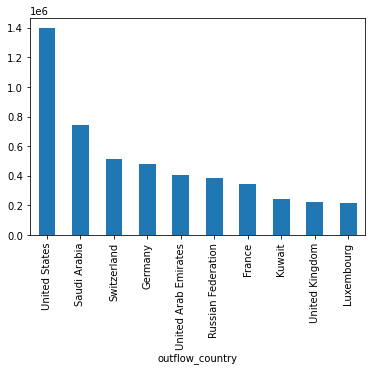

In [19]:
send_countries.total_rem.head(10).plot(kind='bar')

# Top SENDERS (0-15)

In [30]:
for i in range(5):
    senders.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Top 5 Senders')

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [21]:
for i in range(5,10):
    senders.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.5 - 10')

NameError: name 'senders' is not defined

In [23]:
for i in range(10,15):
    senders.iloc[i].plot()
    plt.legend(loc='best')
    plt.title('Senders no.10 - 15')

NameError: name 'senders' is not defined

In [22]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='b', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

NameError: name 'axes' is not defined

In [ ]:
plt.close('all')

In [ ]:
# overlap between senders and receivers
# what are the top migrant groups in SEDING countries